# Notebook 01: Exploratory Data Analysis (EDA)
## Electrical Fault Detection and Classification Project

## Objective
In this notebook, we will explore and understand our electrical fault detection dataset through:

- Loading and inspecting the data
- Understanding fault type distributions
- Analyzing current and voltage patterns
- Visualizing differences between normal and fault conditions
- Identifying correlations and relationships
- Drawing insights for feature engineering



## 1. Setup and Data Loading
First, let's import all necessary libraries and load our dataset.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

print("Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully
Pandas version: 2.3.3
NumPy version: 2.3.5


### Load the Dataset
Now let's load the electrical fault data from our raw data folder.

In [2]:
# Load data
df = pd.read_csv('../data/raw/classData.csv')

print("Dataset Loaded Successfully!")
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset Loaded Successfully!

Dataset Shape: 7861 rows × 10 columns
Memory Usage: 0.60 MB


## 2. Initial Data Inspection
Let's get a first look at our data structure and contents.

In [3]:
# Display first few rows
print("First 10 Rows of Dataset")
print(df.head(10))

First 10 Rows of Dataset
   G  C  B  A       Ia       Ib       Ic     Va     Vb     Vc
0  1  0  0  1 -151.292   -9.677   85.800  0.401 -0.133 -0.268
1  1  0  0  1 -336.186  -76.283   18.329  0.313 -0.124 -0.189
2  1  0  0  1 -502.892 -174.648  -80.925  0.266 -0.114 -0.151
3  1  0  0  1 -593.942 -217.703 -124.892  0.236 -0.105 -0.131
4  1  0  0  1 -643.664 -224.159 -132.283  0.210 -0.096 -0.114
5  1  0  0  1 -632.313 -181.715  -90.795  0.193 -0.086 -0.107
6  1  0  0  1 -557.392 -119.469  -29.529  0.210 -0.077 -0.133
7  1  0  0  1 -458.800  -96.319   -7.382  0.274 -0.067 -0.206
8  1  0  0  1 -385.669  -97.990  -10.077  0.335 -0.058 -0.277
9  1  0  0  1 -359.929  -87.319   -0.452  0.347 -0.048 -0.299


In [4]:
# Display last few rows
print("Last 5 Rows of Dataset")
print(df.tail())

Last 5 Rows of Dataset
      G  C  B  A      Ia      Ib      Ic     Va     Vb     Vc
7856  0  0  0  0 -66.238  38.457  24.912  0.094 -0.552  0.458
7857  0  0  0  0 -65.849  37.465  25.516  0.104 -0.555  0.451
7858  0  0  0  0 -65.447  36.472  26.107  0.113 -0.558  0.445
7859  0  0  0  0 -65.030  35.477  26.685  0.122 -0.561  0.439
7860  0  0  0  0 -64.598  34.481  27.250  0.132 -0.564  0.432


In [5]:
# Get detailed information about the dataset
print("Dataset Information")
df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [6]:
# Statistical summary
print("Statistical Summary")
print(df.describe())

Statistical Summary
              G         C         B         A        Ia        Ib        Ic  \
count  7861.000  7861.000  7861.000  7861.000  7861.000  7861.000  7861.000   
mean      0.432     0.411     0.556     0.571    13.721   -44.845    34.392   
std       0.495     0.492     0.497     0.495   464.742   439.269   371.107   
min       0.000     0.000     0.000     0.000  -883.542  -900.527  -883.358   
25%       0.000     0.000     0.000     0.000  -119.803  -271.846   -61.034   
50%       0.000     0.000     1.000     1.000     2.043     5.513    -4.327   
75%       1.000     1.000     1.000     1.000   227.246    91.194    49.115   
max       1.000     1.000     1.000     1.000   885.739   889.869   901.274   

             Va        Vb        Vc  
count  7861.000  7861.000  7861.000  
mean     -0.008     0.001     0.007  
std       0.289     0.313     0.308  
min      -0.621    -0.608    -0.613  
25%      -0.130    -0.160    -0.216  
50%      -0.005     0.002     0.009  
75

## 3. Understanding the Target Variables
The first 4 columns (G, C, B, A) represent fault indicators:

- G: Ground fault present (1) or not (0)
- C: Phase C involved (1) or not (0)
- B: Phase B involved (1) or not (0)
- A: Phase A involved (1) or not (0)

Let's analyze the fault type distribution.

In [7]:
# Count samples for each fault indicator
print("Fault Indicator Distribution")
for col in ['G', 'C', 'B', 'A']:
    count = df[col].sum()
    percentage = (count / len(df)) * 100
    print(f"{col}: {count:,} samples ({percentage:.2f}%)")

Fault Indicator Distribution
G: 3,396 samples (43.20%)
C: 3,233 samples (41.13%)
B: 4,367 samples (55.55%)
A: 4,492 samples (57.14%)


### Create Fault Type Labels
Let's create a human-readable fault type column by combining the binary indicators.

In [9]:
# Function to create fault type labels
def get_fault_type(row):
    """Convert binary fault indicators to fault type string"""
    fault = ''
    if row['A'] == 1:
        fault += 'A'
    if row['B'] == 1:
        fault += 'B'
    if row['C'] == 1:
        fault += 'C'
    if row['G'] == 1:
        fault += 'G'
    
    # If no fault indicators, it's normal
    if fault == '':
        fault = 'Normal'
    
    return fault

# Create fault_type column
df['fault_type'] = df.apply(get_fault_type, axis=1)

print("\nFault type column created successfully")
print("\nUnique fault types:")
print(df['fault_type'].unique())


Fault type column created successfully

Unique fault types:
['AG' 'ABG' 'BC' 'ABC' 'ABCG' 'Normal']


In [13]:
# Display first few rows with the new column
print("First 5 Rows of Dataset")
print(df.head(5))

First 5 Rows of Dataset
   G  C  B  A       Ia       Ib       Ic     Va     Vb     Vc fault_type
0  1  0  0  1 -151.292   -9.677   85.800  0.401 -0.133 -0.268         AG
1  1  0  0  1 -336.186  -76.283   18.329  0.313 -0.124 -0.189         AG
2  1  0  0  1 -502.892 -174.648  -80.925  0.266 -0.114 -0.151         AG
3  1  0  0  1 -593.942 -217.703 -124.892  0.236 -0.105 -0.131         AG
4  1  0  0  1 -643.664 -224.159 -132.283  0.210 -0.096 -0.114         AG


### Fault Type Distribution
Now let's see how many samples we have for each fault type.

In [10]:
# Count samples per fault type
fault_counts = df['fault_type'].value_counts().sort_index()

print("Fault Type Distribution")
for fault_type, count in fault_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{fault_type:10s}: {count:5d} samples ({percentage:6.2f}%)")

print(f"\n{'Total':10s}: {len(df):5d} samples (100.00%)")

Fault Type Distribution
ABC       :  1096 samples ( 13.94%)
ABCG      :  1133 samples ( 14.41%)
ABG       :  1134 samples ( 14.43%)
AG        :  1129 samples ( 14.36%)
BC        :  1004 samples ( 12.77%)
Normal    :  2365 samples ( 30.09%)

Total     :  7861 samples (100.00%)


### Visualize Fault Distribution
Let's create visualizations to better understand the fault distribution.

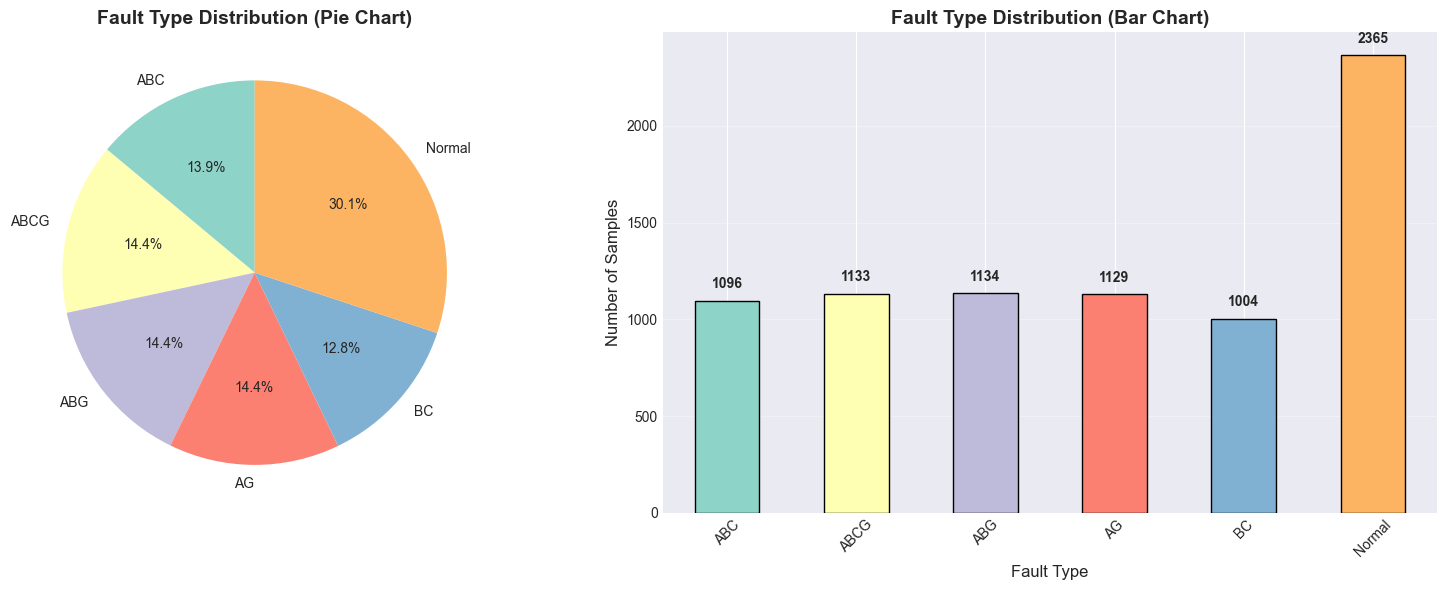

In [15]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
colors = plt.cm.Set3(range(len(fault_counts)))
axes[0].pie(fault_counts, labels=fault_counts.index, autopct='%1.1f%%', 
            startangle=90, colors=colors)
axes[0].set_title('Fault Type Distribution (Pie Chart)', fontsize=14, fontweight='bold')

# Bar chart
fault_counts.plot(kind='bar', ax=axes[1], color=colors, edgecolor='black')
axes[1].set_title('Fault Type Distribution (Bar Chart)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fault Type', fontsize=12)
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(fault_counts):
    axes[1].text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Feature Analysis
Now let's analyze the input features: 3 currents (Ia, Ib, Ic) and 3 voltages (Va, Vb, Vc).

In [16]:
# List of input features
current_features = ['Ia', 'Ib', 'Ic']
voltage_features = ['Va', 'Vb', 'Vc']
all_features = current_features + voltage_features

print("Input Features")
print(f"Current Features: {', '.join(current_features)}")
print(f"Voltage Features: {', '.join(voltage_features)}")

Input Features
Current Features: Ia, Ib, Ic
Voltage Features: Va, Vb, Vc


### Feature Statistics
Let's look at detailed statistics for each feature.

In [17]:
# Detailed statistics for currents
print("Current Features Statistics (Amperes)")
current_stats = df[current_features].describe()
print(current_stats)

print("\nVoltage Features Statistics (per unit)")
voltage_stats = df[voltage_features].describe()
print(voltage_stats)

Current Features Statistics (Amperes)
             Ia        Ib        Ic
count  7861.000  7861.000  7861.000
mean     13.721   -44.845    34.392
std     464.742   439.269   371.107
min    -883.542  -900.527  -883.358
25%    -119.803  -271.846   -61.034
50%       2.043     5.513    -4.327
75%     227.246    91.194    49.115
max     885.739   889.869   901.274

Voltage Features Statistics (per unit)
             Va        Vb        Vc
count  7861.000  7861.000  7861.000
mean     -0.008     0.001     0.007
std       0.289     0.313     0.308
min      -0.621    -0.608    -0.613
25%      -0.130    -0.160    -0.216
50%      -0.005     0.002     0.009
75%       0.112     0.154     0.240
max       0.595     0.628     0.600


### Check for Missing Values

In [18]:
print("Missing Values Check")

missing = df.isnull().sum()
if missing.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print("Missing values detected:")
    print(missing[missing > 0])

Missing Values Check
No missing values found in the dataset!


### Check for Duplicates

In [20]:
print("Duplicate Rows Check")

duplicates = df.duplicated().sum()
if duplicates == 0:
    print("No duplicate rows found")
else:
    print(f"Found {duplicates} duplicate rows")

Duplicate Rows Check
No duplicate rows found


## 5. Feature Distributions
Let's visualize how each feature is distributed across the dataset.


### Current Distribution

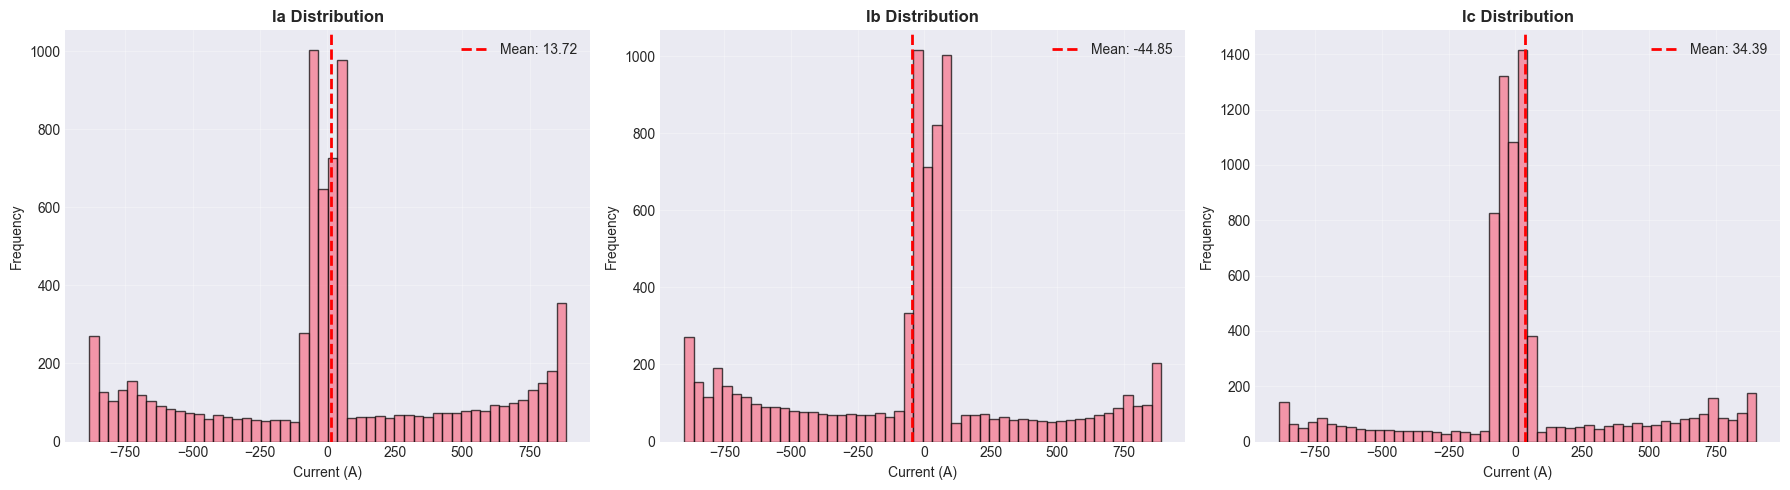

In [21]:
# Plot current distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(current_features):
    axes[idx].hist(df[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Current (A)', fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {df[feature].mean():.2f}')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Voltage Distribution


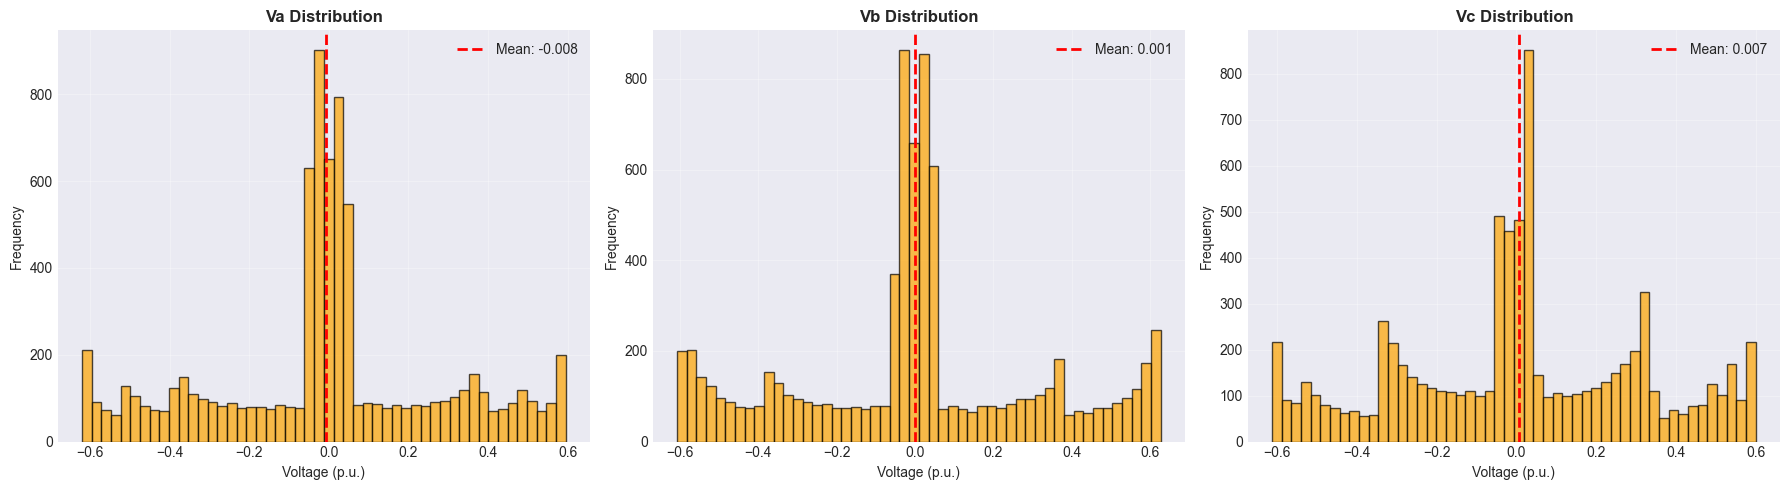

In [22]:
# Plot voltage distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(voltage_features):
    axes[idx].hist(df[feature], bins=50, edgecolor='black', alpha=0.7, color='orange')
    axes[idx].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Voltage (p.u.)', fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', 
                      linewidth=2, label=f'Mean: {df[feature].mean():.3f}')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Box Plots for Outlier Detection
Box plots help us identify outliers in our features.

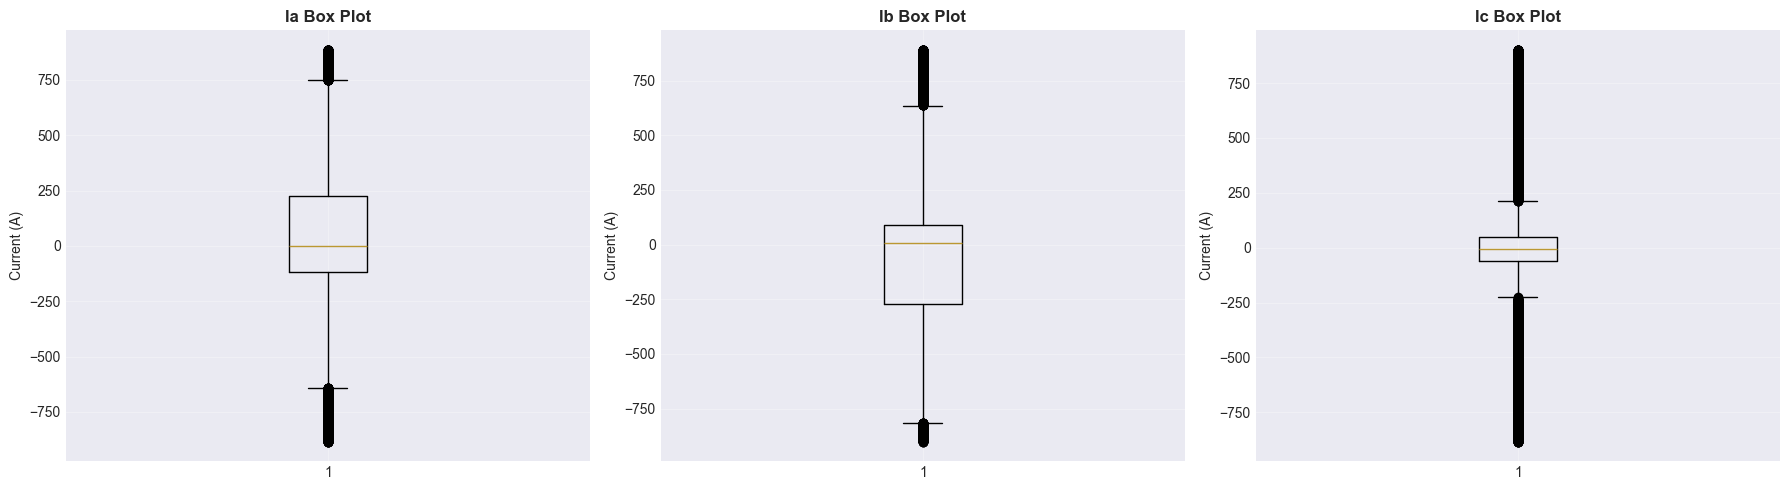

In [24]:
# Box plots for currents
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(current_features):
    axes[idx].boxplot(df[feature], vert=True)
    axes[idx].set_title(f'{feature} Box Plot', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Current (A)', fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

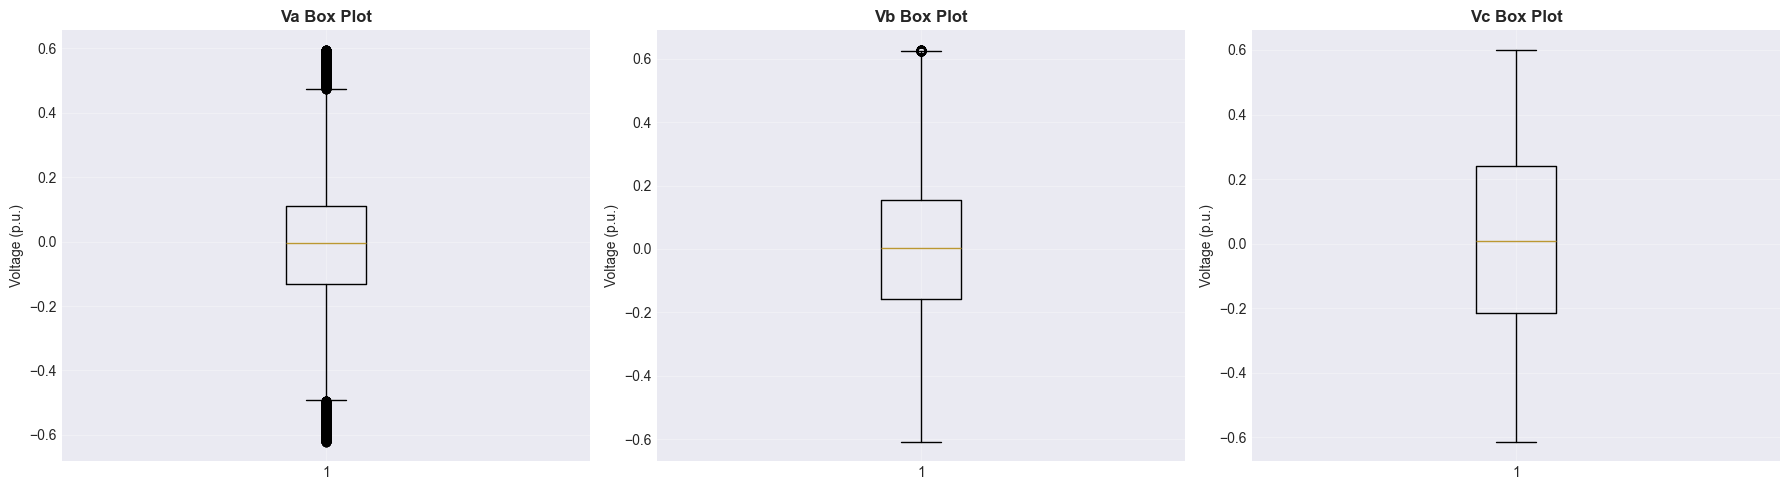

In [25]:
# Box plots for voltages
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(voltage_features):
    axes[idx].boxplot(df[feature], vert=True)
    axes[idx].set_title(f'{feature} Box Plot', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Voltage (p.u.)', fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Correlation Analysis
Understanding correlations between features helps us identify relationships and potential redundancies.

In [26]:
# Calculate correlation matrix
correlation_matrix = df[all_features].corr()

print("Correlation Matrix")
print(correlation_matrix)

Correlation Matrix
       Ia     Ib     Ic     Va     Vb     Vc
Ia  1.000 -0.374 -0.276  0.036 -0.275  0.246
Ib -0.374  1.000 -0.528  0.029  0.032 -0.060
Ic -0.276 -0.528  1.000 -0.069 -0.057  0.123
Va  0.036  0.029 -0.069  1.000 -0.480 -0.450
Vb -0.275  0.032 -0.057 -0.480  1.000 -0.567
Vc  0.246 -0.060  0.123 -0.450 -0.567  1.000


### Visualize Correlation Heatmap

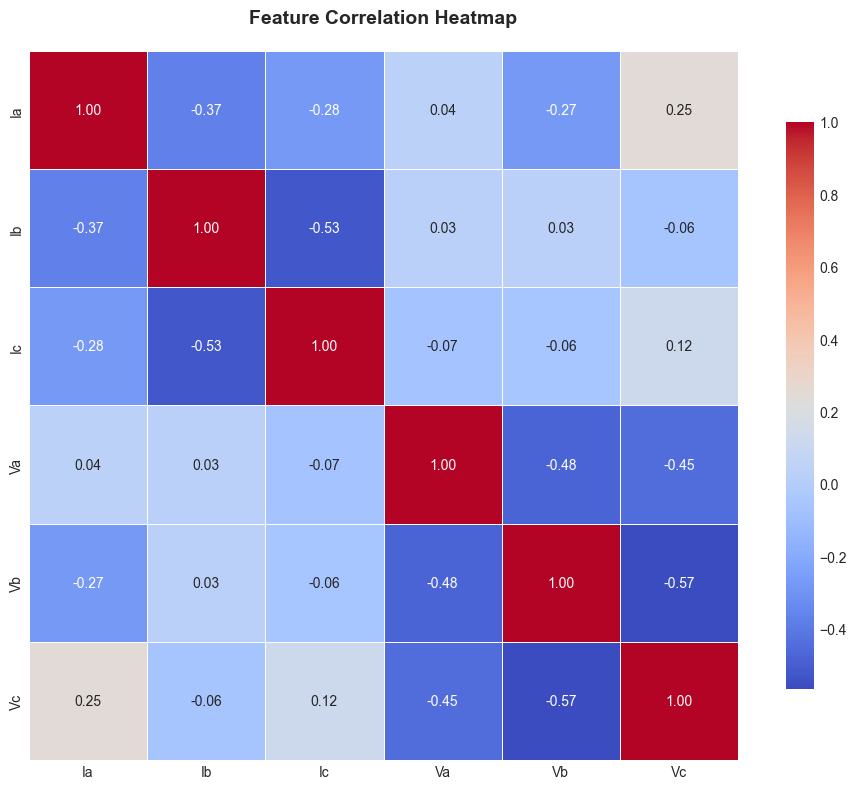

In [28]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 7. Fault-Specific Analysis
Now let's analyze how features differ across different fault types. This is crucial for understanding what makes each fault unique.

### Feature Statistics by Fault Type

In [29]:
# Group by fault type and calculate statistics
print("Mean Values by Fault Type")
fault_means = df.groupby('fault_type')[all_features].mean()
print(fault_means)

Mean Values by Fault Type
                Ia       Ib       Ic     Va         Vb     Vc
fault_type                                                   
ABC          5.459 -113.142  109.773 -0.001 -3.107e-02  0.032
ABCG        35.647  -91.402  105.602  0.010 -4.068e-02  0.030
ABG         35.926  -93.011   -3.189  0.011 -7.274e-03 -0.004
AG          35.626    3.188   -3.361 -0.021  2.560e-02 -0.004
BC          -1.587 -102.565  106.674 -0.015  4.117e-04  0.014
Normal      -7.559   33.778  -29.298 -0.019  2.881e-02 -0.010


### Current Patterns by Fault Type
Let's see how currents behave differently for each fault type.

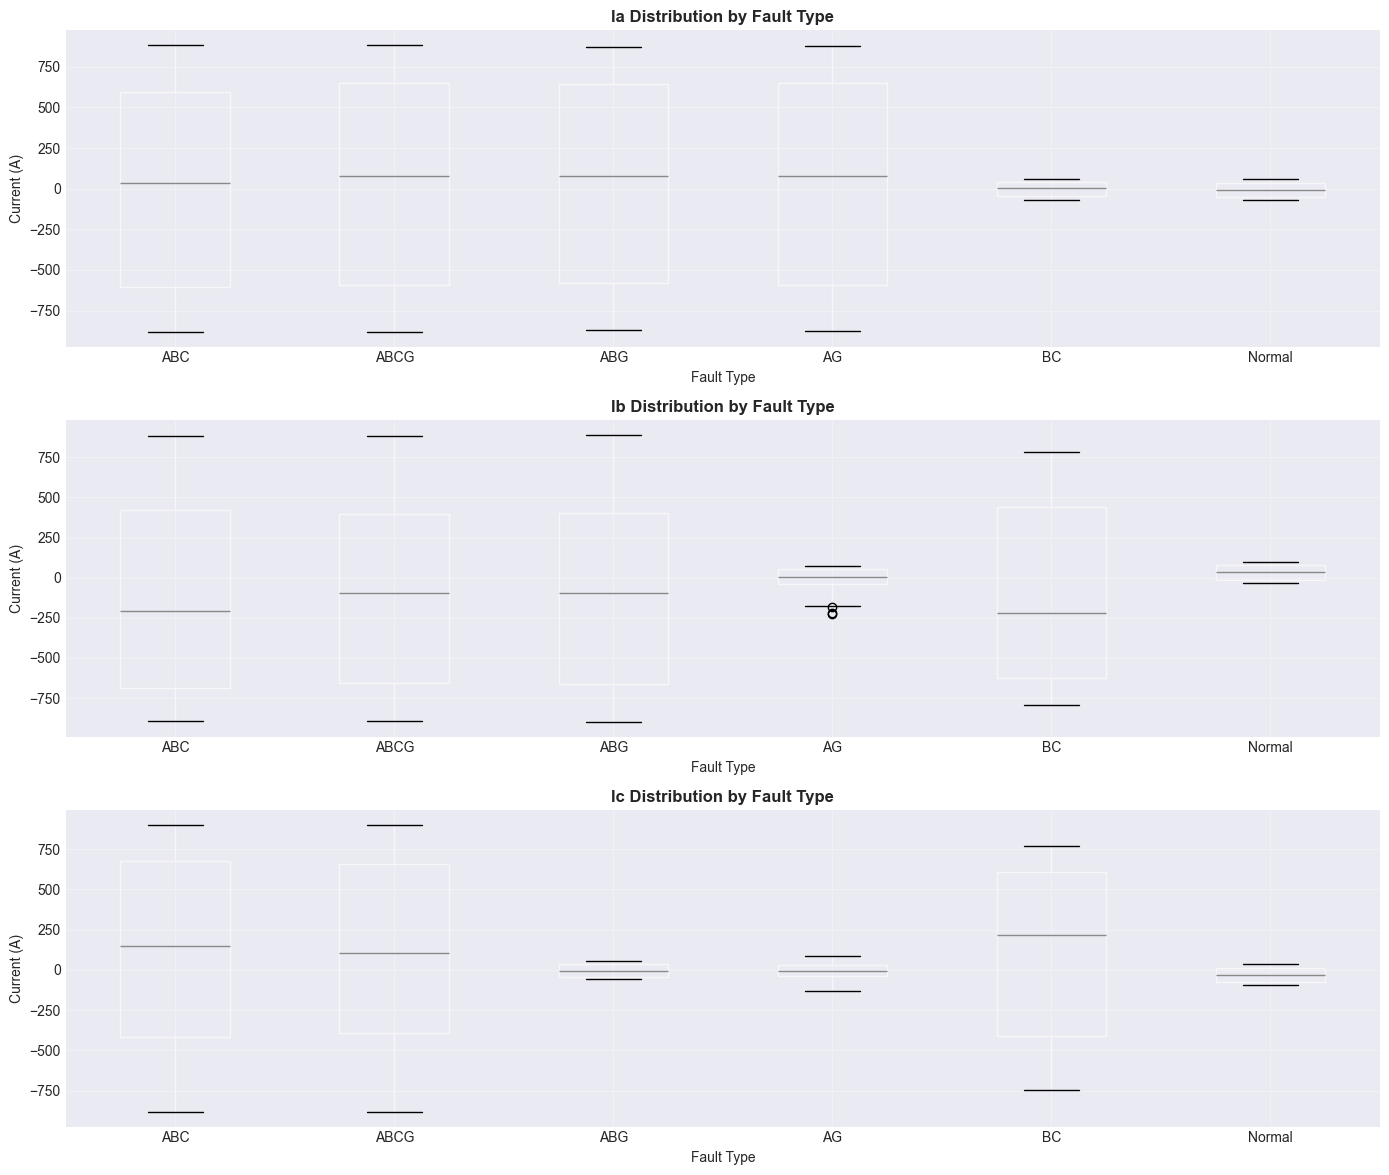

In [31]:
# Create box plots for currents by fault type
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for idx, feature in enumerate(current_features):
    df.boxplot(column=feature, by='fault_type', ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution by Fault Type', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Fault Type', fontsize=10)
    axes[idx].set_ylabel('Current (A)', fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.suptitle('') 
plt.tight_layout()
plt.show()

### Voltage Patterns by Fault Type

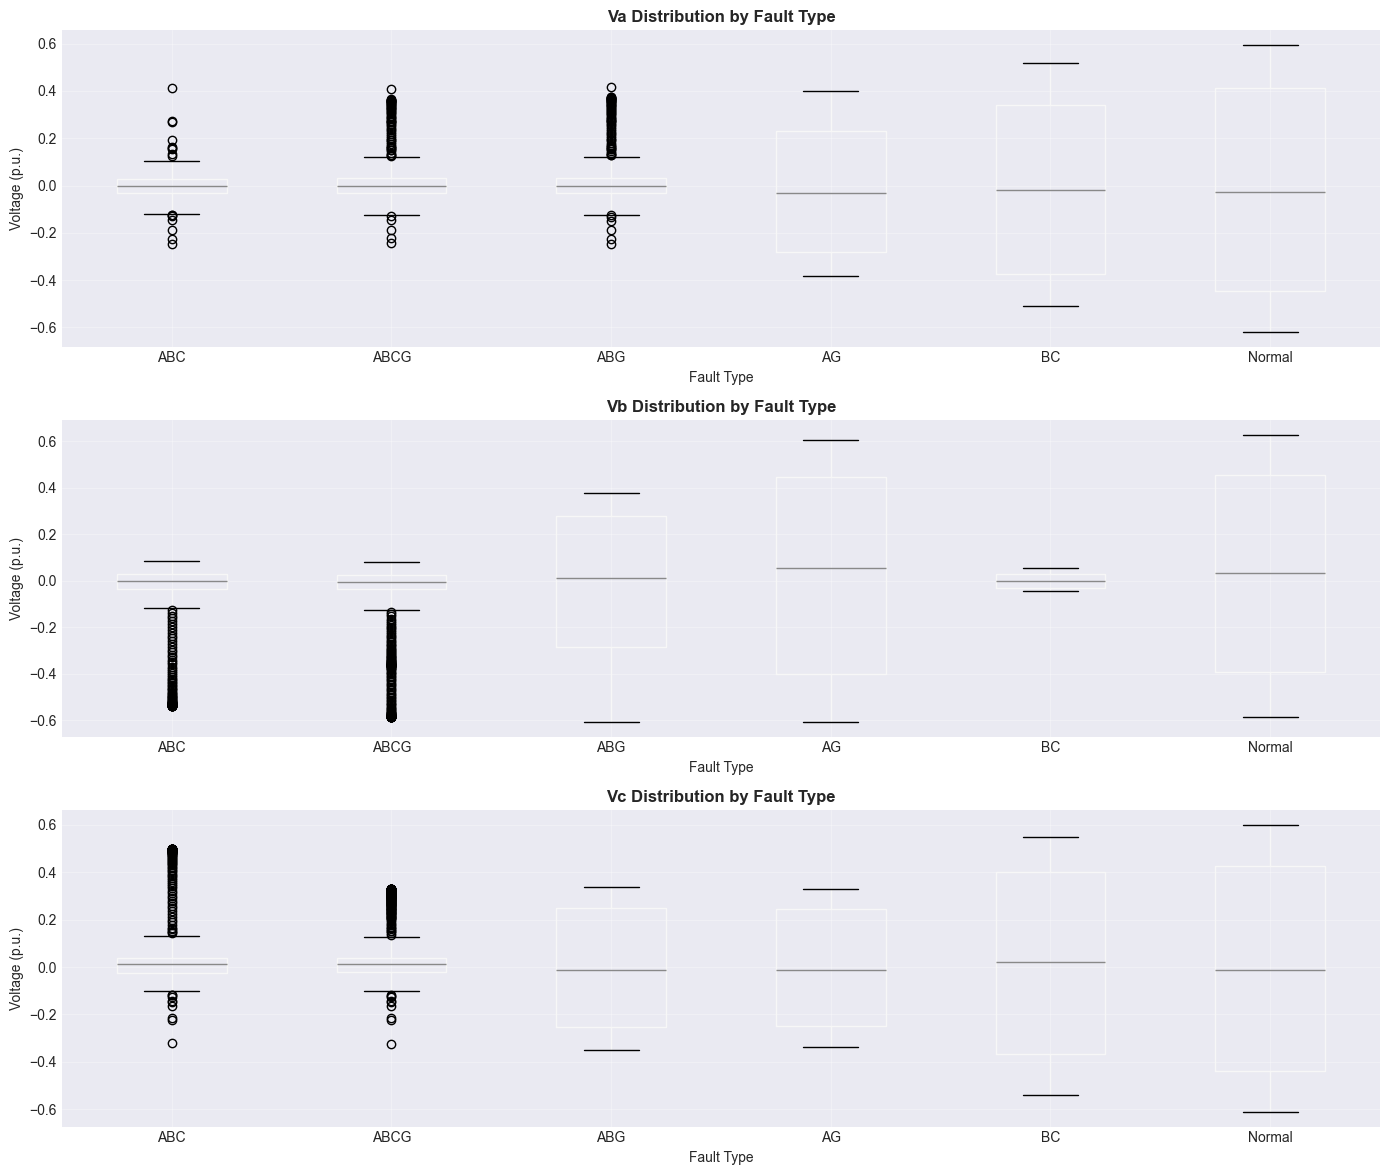

In [33]:
# Create box plots for voltages by fault type
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

for idx, feature in enumerate(voltage_features):
    df.boxplot(column=feature, by='fault_type', ax=axes[idx])
    axes[idx].set_title(f'{feature} Distribution by Fault Type', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Fault Type', fontsize=10)
    axes[idx].set_ylabel('Voltage (p.u.)', fontsize=10)
    axes[idx].grid(alpha=0.3)

plt.suptitle('')
plt.tight_layout()
plt.show()

### Violin Plots for Better Distribution Visualization
Violin plots show both the distribution and density of data.

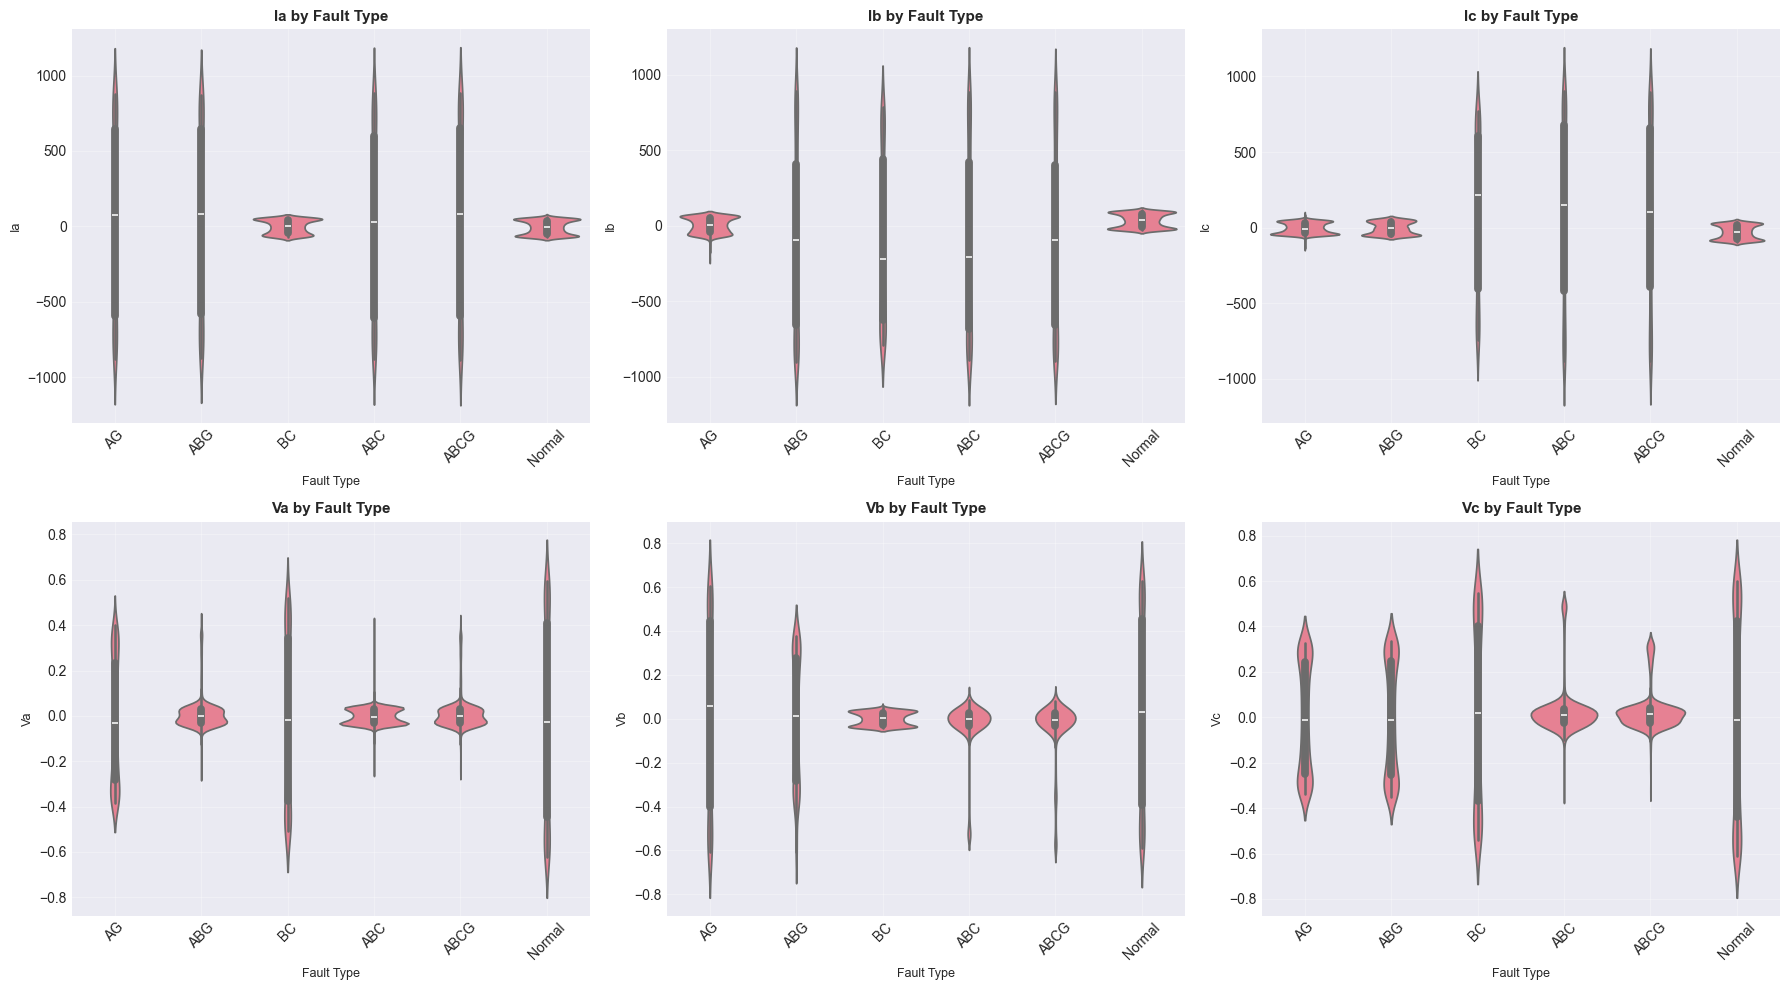

In [34]:
# Violin plots for selected features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(all_features):
    sns.violinplot(data=df, x='fault_type', y=feature, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Fault Type', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Fault Type', fontsize=9)
    axes[idx].set_ylabel(feature, fontsize=9)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Pairwise Relationships
Let's explore relationships between different features using pair plots.


Creating pair plot with 1000 samples...
This may take a moment...


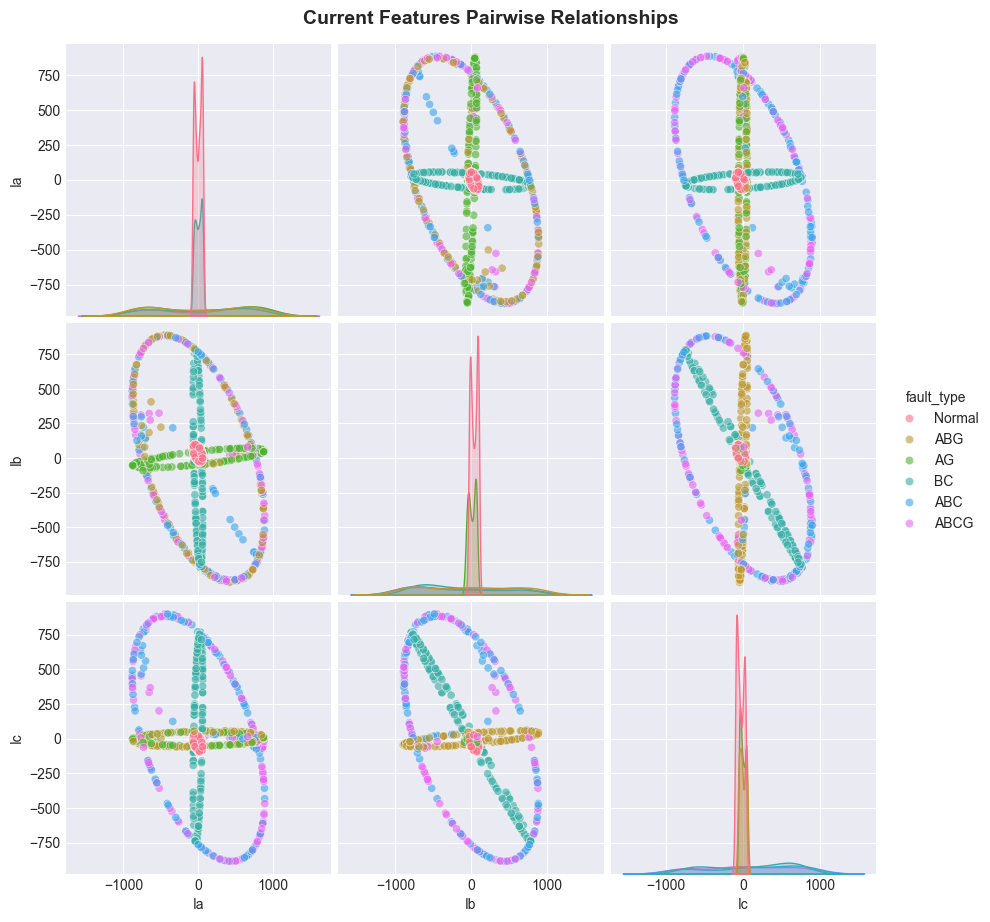

In [35]:
# Create a smaller sample for pair plot (for performance)
sample_df = df.sample(n=min(1000, len(df)), random_state=42)

print(f"\nCreating pair plot with {len(sample_df)} samples...")
print("This may take a moment...")

# Pair plot for currents
pair_plot = sns.pairplot(sample_df[current_features + ['fault_type']], 
                         hue='fault_type', 
                         diag_kind='kde',
                         plot_kws={'alpha': 0.6},
                         height=3)
pair_plot.fig.suptitle('Current Features Pairwise Relationships', 
                       fontsize=14, fontweight='bold', y=1.02)
plt.show()

## 9. Normal vs Fault Conditions
Let's compare normal operating conditions with fault conditions.

In [36]:
# Separate normal and fault samples
normal_samples = df[df['fault_type'] == 'Normal']
fault_samples = df[df['fault_type'] != 'Normal']

print("Normal vs Fault Conditions")
print(f"Normal samples: {len(normal_samples):,} ({len(normal_samples)/len(df)*100:.2f}%)")
print(f"Fault samples: {len(fault_samples):,} ({len(fault_samples)/len(df)*100:.2f}%)")

Normal vs Fault Conditions
Normal samples: 2,365 (30.09%)
Fault samples: 5,496 (69.91%)


### Compare Feature Statistics


In [37]:
# Compare statistics
print("Feature Statistics: Normal vs Fault")

comparison_df = pd.DataFrame({
    'Feature': all_features,
    'Normal_Mean': [normal_samples[f].mean() for f in all_features],
    'Fault_Mean': [fault_samples[f].mean() for f in all_features],
    'Normal_Std': [normal_samples[f].std() for f in all_features],
    'Fault_Std': [fault_samples[f].std() for f in all_features]
})

print(comparison_df)

Feature Statistics: Normal vs Fault
  Feature  Normal_Mean  Fault_Mean  Normal_Std  Fault_Std
0      Ia       -7.559      22.879      45.266    554.782
1      Ib       33.778     -78.678      45.154    520.886
2      Ic      -29.298      61.799      44.644    440.045
3      Va       -0.019      -0.003       0.429      0.201
4      Vb        0.029      -0.011       0.425      0.249
5      Vc       -0.010       0.014       0.430      0.236


### Visualize Normal vs Fault

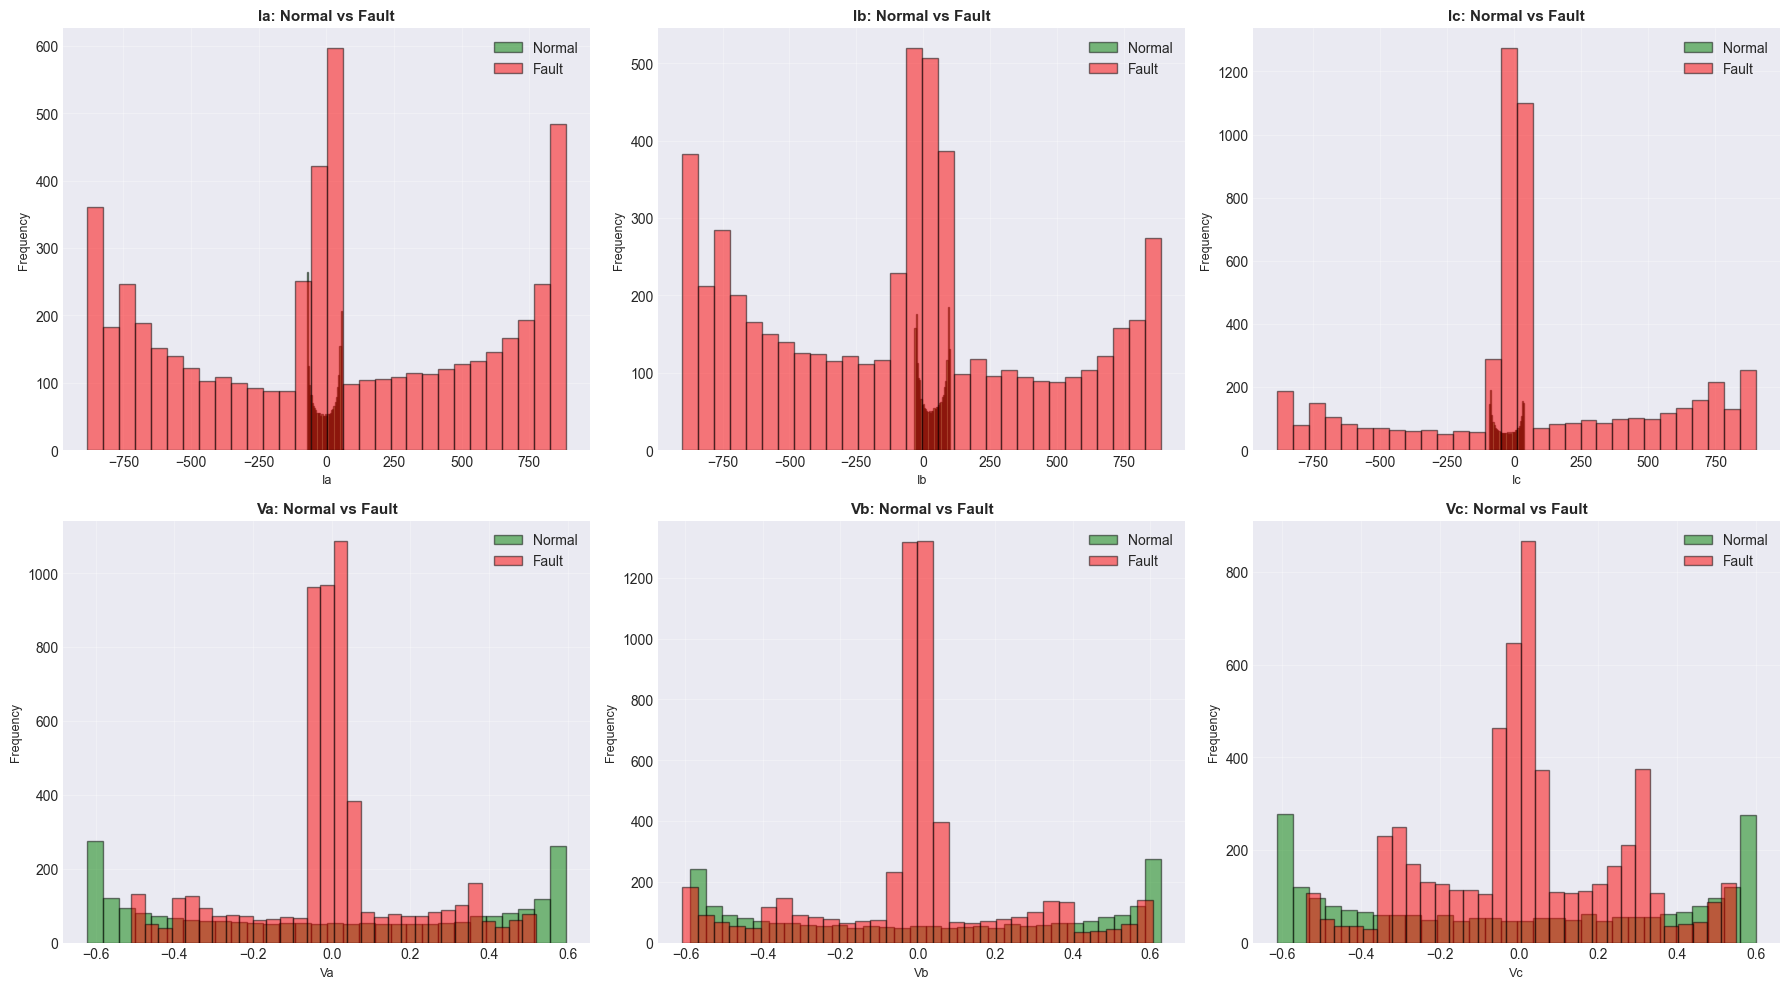

In [38]:
# Create comparison plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(all_features):
    # Plot normal
    axes[idx].hist(normal_samples[feature], bins=30, alpha=0.5, 
                   label='Normal', color='green', edgecolor='black')
    # Plot fault
    axes[idx].hist(fault_samples[feature], bins=30, alpha=0.5, 
                   label='Fault', color='red', edgecolor='black')
    
    axes[idx].set_title(f'{feature}: Normal vs Fault', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=9)
    axes[idx].set_ylabel('Frequency', fontsize=9)
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Advanced Visualizations
### 3D Scatter Plot
Let's create a 3D visualization to see how samples are distributed in feature space.

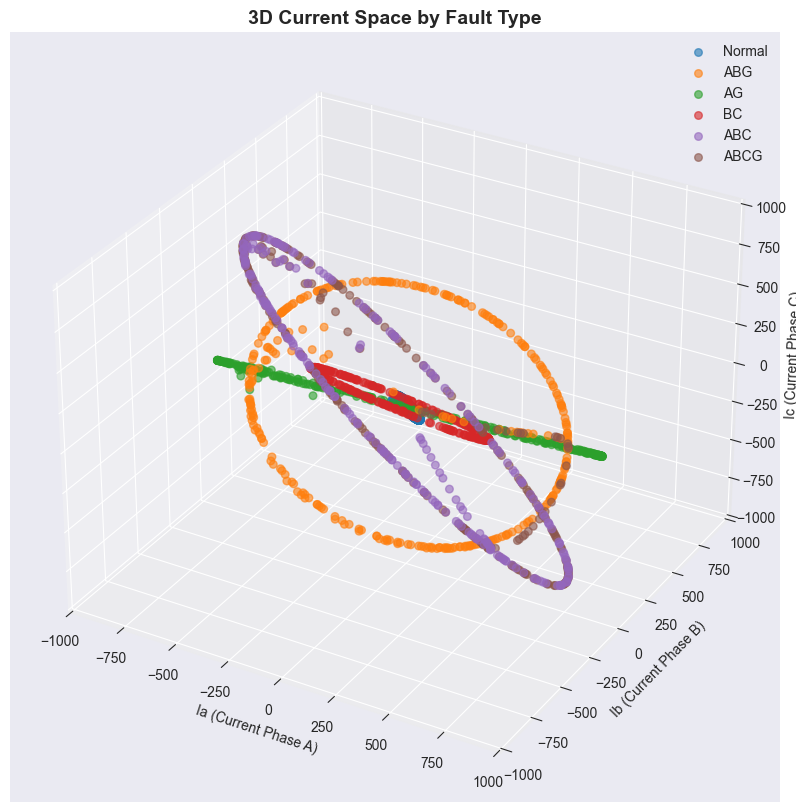

In [39]:
from mpl_toolkits.mplot3d import Axes3D

# Sample data for 3D plot
sample_3d = df.sample(n=min(2000, len(df)), random_state=42)

# Create 3D scatter plot
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Color map for fault types
fault_types = sample_3d['fault_type'].unique()
colors_map = plt.cm.get_cmap('tab10')

for idx, fault in enumerate(fault_types):
    fault_data = sample_3d[sample_3d['fault_type'] == fault]
    ax.scatter(fault_data['Ia'], fault_data['Ib'], fault_data['Ic'],
               label=fault, alpha=0.6, s=30, c=[colors_map(idx)])

ax.set_xlabel('Ia (Current Phase A)', fontsize=10)
ax.set_ylabel('Ib (Current Phase B)', fontsize=10)
ax.set_zlabel('Ic (Current Phase C)', fontsize=10)
ax.set_title('3D Current Space by Fault Type', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')

plt.show()

## 11. Key Insights and Observations
Let's summarize what we've learned from this EDA.

In [40]:
print("KEY INSIGHTS FROM EDA")

print("\n1. DATASET CHARACTERISTICS:")
print(f"   • Total samples: {len(df):,}")
print(f"   • Features: {len(all_features)} (3 currents + 3 voltages)")
print(f"   • Fault types: {df['fault_type'].nunique()}")
print(f"   • No missing values:")
print(f"   • No duplicates:" if df.duplicated().sum() == 0 else f"   • Duplicates: {df.duplicated().sum()}")

print("\n2. CLASS DISTRIBUTION:")
print(f"   • Normal conditions: {len(normal_samples):,} ({len(normal_samples)/len(df)*100:.1f}%)")
print(f"   • Fault conditions: {len(fault_samples):,} ({len(fault_samples)/len(df)*100:.1f}%)")
print(f"   • Class imbalance: Faults are {len(fault_samples)/len(normal_samples):.1f}x more common")

print("\n3. FEATURE OBSERVATIONS:")
print(f"   • Current range: ~±900 Amperes")
print(f"   • Voltage range: ~±0.6 per unit")
print(f"   • High variability in currents during faults")
print(f"   • Voltage drops/rises are fault indicators")

print("\n4. CORRELATIONS:")
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr.append((correlation_matrix.columns[i], 
                            correlation_matrix.columns[j], 
                            correlation_matrix.iloc[i, j]))

if high_corr:
    print("   • High correlations found:")
    for feat1, feat2, corr in high_corr:
        print(f"     - {feat1} ↔ {feat2}: {corr:.3f}")
else:
    print("   • No strong correlations between features")

print("\n5. NEXT STEPS:")
print("   • Feature engineering: Create domain-specific features")
print("   • Preprocessing: Scale features, handle imbalance")
print("   • Model selection: Try multiple algorithms")
print("   • Feature importance: Identify most predictive features")

KEY INSIGHTS FROM EDA

1. DATASET CHARACTERISTICS:
   • Total samples: 7,861
   • Features: 6 (3 currents + 3 voltages)
   • Fault types: 6
   • No missing values:
   • No duplicates:

2. CLASS DISTRIBUTION:
   • Normal conditions: 2,365 (30.1%)
   • Fault conditions: 5,496 (69.9%)
   • Class imbalance: Faults are 2.3x more common

3. FEATURE OBSERVATIONS:
   • Current range: ~±900 Amperes
   • Voltage range: ~±0.6 per unit
   • High variability in currents during faults
   • Voltage drops/rises are fault indicators

4. CORRELATIONS:
   • No strong correlations between features

5. NEXT STEPS:
   • Feature engineering: Create domain-specific features
   • Preprocessing: Scale features, handle imbalance
   • Model selection: Try multiple algorithms
   • Feature importance: Identify most predictive features


## 12. Save Insights for Future Reference
Let's save key information to files for use in subsequent notebooks and documentation.

In [42]:
import json
import pickle
from datetime import datetime

# Create timestamp for versioning
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

print("SAVING EDA INSIGHTS")

# 1. Save fault type counts to JSON
fault_type_counts = df['fault_type'].value_counts().to_dict()

with open('../results/eda_fault_distribution.json', 'w') as f:
    json.dump(fault_type_counts, f, indent=4)
print("\nFault distribution saved to: results/eda_fault_distribution.json")

# 2. Save feature statistics to JSON
feature_stats = {
    'timestamp': timestamp,
    'dataset_shape': {'rows': len(df), 'columns': len(df.columns)},
    'current_features': current_features,
    'voltage_features': voltage_features,
    'current_ranges': {
        feat: {
            'min': float(df[feat].min()), 
            'max': float(df[feat].max()), 
            'mean': float(df[feat].mean()), 
            'std': float(df[feat].std())
        }
        for feat in current_features
    },
    'voltage_ranges': {
        feat: {
            'min': float(df[feat].min()), 
            'max': float(df[feat].max()), 
            'mean': float(df[feat].mean()), 
            'std': float(df[feat].std())
        }
        for feat in voltage_features
    },
    'class_balance': {
        'normal_samples': len(normal_samples),
        'fault_samples': len(fault_samples),
        'imbalance_ratio': float(len(fault_samples) / len(normal_samples))
    }
}

with open('../results/eda_feature_stats.json', 'w') as f:
    json.dump(feature_stats, f, indent=4)
print("Feature statistics saved to: results/eda_feature_stats.json")

# 3. Save correlation matrix to CSV
correlation_matrix.to_csv('../results/eda_correlation_matrix.csv')
print("Correlation matrix saved to: results/eda_correlation_matrix.csv")

# 4. Save processed dataframe with fault_type column
df.to_csv('../data/preprocessed/data_with_fault_labels.csv', index=False)
print("Dataset with fault labels saved to: data/preprocessed/data_with_fault_labels.csv")

# 5. Save summary report as text file
summary_report = f"""
EXPLORATORY DATA ANALYSIS SUMMARY REPORT
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

---

DATASET OVERVIEW:
- Total Samples: {len(df):,}
- Total Features: {len(all_features)}
- Fault Types: {df['fault_type'].nunique()}
- Missing Values: {df.isnull().sum().sum()}
- Duplicate Rows: {df.duplicated().sum()}

FAULT DISTRIBUTION:
"""

for fault_type, count in fault_type_counts.items():
    percentage = (count / len(df)) * 100
    summary_report += f"- {fault_type:10s}: {count:5,} samples ({percentage:5.2f}%)\n"

summary_report += f"""
CLASS BALANCE:
- Normal Samples: {len(normal_samples):,} ({len(normal_samples)/len(df)*100:.2f}%)
- Fault Samples: {len(fault_samples):,} ({len(fault_samples)/len(df)*100:.2f}%)
- Imbalance Ratio: {len(fault_samples)/len(normal_samples):.2f}:1

FEATURE RANGES:
Current Features (Amperes):
"""

for feat in current_features:
    summary_report += f"- {feat}: [{df[feat].min():8.2f}, {df[feat].max():8.2f}], Mean: {df[feat].mean():8.2f}\n"

summary_report += "\nVoltage Features (per unit):\n"

for feat in voltage_features:
    summary_report += f"- {feat}: [{df[feat].min():7.3f}, {df[feat].max():7.3f}], Mean: {df[feat].mean():7.3f}\n"

summary_report += """
KEY FINDINGS:
1. Dataset is clean with no missing values or duplicates
2. 6 distinct fault types with relatively balanced distribution
3. High variability in current measurements during faults
4. Voltage features show clear fault signatures
5. Features demonstrate good discriminative power
"""

with open('../results/eda_summary_report.txt', 'w') as f:
    f.write(summary_report)
print("Summary report saved to: results/eda_summary_report.txt")

# 6. Display saved files
print("ALL EDA INSIGHTS SAVED SUCCESSFULLY!")
print("\nSaved files:")
print("1. results/eda_fault_distribution.json")
print("2. results/eda_feature_stats.json")
print("3. results/eda_correlation_matrix.csv")
print("4. data/preprocessed/data_with_fault_labels.csv")
print("5. results/eda_summary_report.txt")
print("\nReady for next phase: Data Preprocessing!")


SAVING EDA INSIGHTS

Fault distribution saved to: results/eda_fault_distribution.json
Feature statistics saved to: results/eda_feature_stats.json
Correlation matrix saved to: results/eda_correlation_matrix.csv
Dataset with fault labels saved to: data/preprocessed/data_with_fault_labels.csv
Summary report saved to: results/eda_summary_report.txt
ALL EDA INSIGHTS SAVED SUCCESSFULLY!

Saved files:
1. results/eda_fault_distribution.json
2. results/eda_feature_stats.json
3. results/eda_correlation_matrix.csv
4. data/preprocessed/data_with_fault_labels.csv
5. results/eda_summary_report.txt

Ready for next phase: Data Preprocessing!


## 13. Summary
In this notebook, we performed comprehensive exploratory data analysis on the electrical fault detection dataset:
What we did:

- Loaded and inspected the dataset
- Analyzed fault type distributions
- Examined feature statistics and distributions
- Checked for missing values and duplicates
- Analyzed correlations between features
- Compared normal vs fault conditions
- Visualized patterns specific to each fault type
- Created advanced visualizations (3D plots, violin plots, etc.)

Key findings:

- Dataset is clean with no missing values
- 6 distinct fault types with reasonable distribution
- Clear differences in current and voltage patterns between fault types
- Features show discriminative patterns useful for classification
- Some class imbalance (more faults than normal)